# Build Bar Chart

Importing all dependencies

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd #we can also plot data directly from a Pandas framework

Fetching our data set

In [4]:
df_namerica = pd.read_csv('https://raw.githubusercontent.com/arpgpt/data-visualization/master/north_america.csv', index_col='country')

Before plotting, we convert the column headings from a string to integer data type, since they represent numerical values.

* Extract year from last 4 characters of each column name.

* The current column names are structured as 'gdpPercap_(year)',
so we want to keep the (year) part only for clarity when plotting GDP vs. years

* To do this we use strip(), which removes from the string the characters stated in the argument

* This method works on strings, so we call str before strip()

In [5]:
years = df_namerica.columns.str.strip('gdpPercap_')
df_namerica.columns = years.astype(int) # Convert year values to integers, saving results back to dataframe

We will now plot a bar chart for all the countries in North America.



Text(0, 0.5, 'GDP per capita')

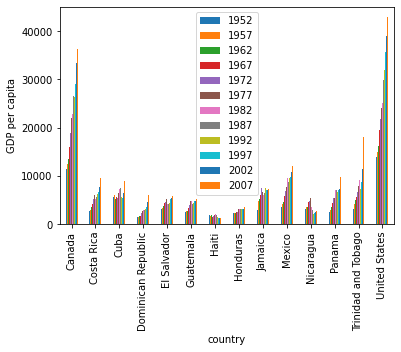

In [6]:
df_namerica.plot(kind='bar') #change kind to 'bar', to plot a vertical bar chart

plt.ylabel('GDP per capita')

This seems too crowded. Let's plot the data for a specific country. 'Panama' as an example: We will use loc to specify the country name.

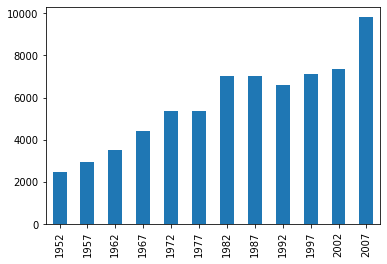

In [7]:
df_namerica.loc['Panama'].plot(kind='bar')  
#Plot data for Panama, note that we use loc here and not iloc

Similary, we will now plot data for first 2 countries in our data set using iloc.

**iloc** - integer location based this is used when we want to show the data using the arrays 

for example

```python 
df_namerica.iloc[0:2].plot(kind='bar')
```
This will show the plot for two countries namely at the indices 0 and 1.

And seperaterly 
**loc** works by label based , which means that you have to sepcify rows and columns based on their row and column tables 

**iloc** 

iloc is integer position-based, so you have to specify rows and columns by their integer position values (0-based integer position).

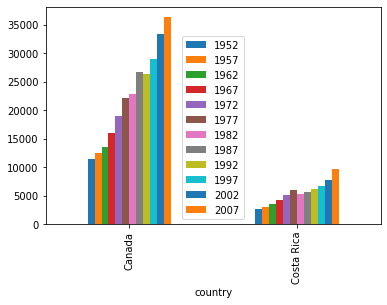

In [8]:
df_namerica.iloc[0:2].plot(kind='bar')
#Plot data for Canada(1) and Costa Rica(2), note that we use loc here and not iloc

We may also plot data for specific number of rows and columns using iloc. 

The syntax for the same is dataframe.iloc[row, column].plot()

> #Plot data for Canada (first entry in the row) and the years 1952, 1957, 1962 and 1967 (first 4 entries in the columns)

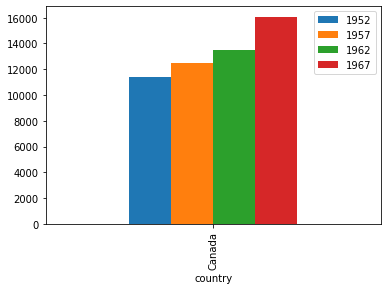

In [9]:

df_namerica.iloc[0:1, 0:4].plot(kind='bar')  


Similarilt if I change the rows then I can adjust more countries 

Understand by the example

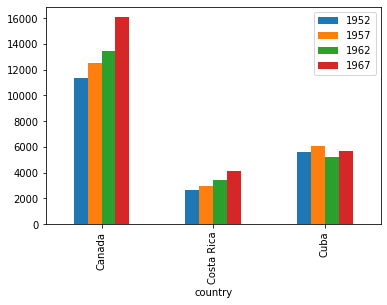

In [10]:
df_namerica.iloc[0:3, 0:4].plot(kind='bar')  

## Change Position of Legend

We may change the position of the legend on our graph by explicitly specifying the desired position. By defaut the position is 'upper right' Some other positions that can be defined for a legend are:

![Different type of positions ofr legends](https://raw.githubusercontent.com/arpgpt/data-visualization/master/legend.jpg)

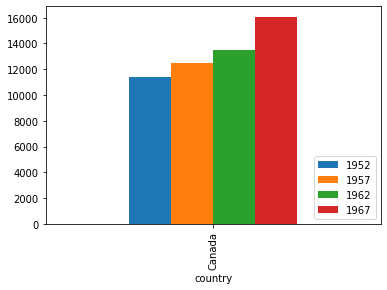

In [13]:
df_namerica.iloc[0:1, 0:4].plot(kind='bar')  

#plt.legend(loc = "lower left") #Here we used location string

plt.legend(loc = 4) #We may also used the corresponding location code, uncomment the code and run it

# Horizontal Bar Chart

While the default Bar Chart is vertically aligned, We may plot a horizontal bar chart by explicitly specifying the chart type.

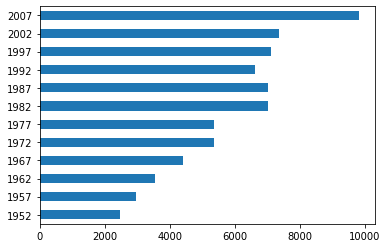

In [14]:
df_namerica.loc['Panama'].plot(kind='barh')  
#Plot data for Panama, specify plot kind as 'barh'

## Colors of Bars

Colors of Bars
We may change the bar color and add some other visual features.

To change the color, we specify the color as an attribute for plot()

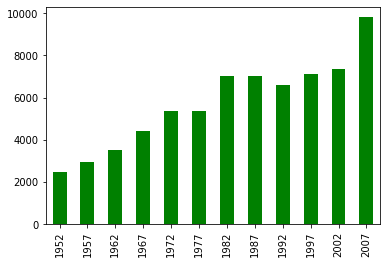

In [15]:
#Here we have green color bars
df_namerica.loc['Panama'].plot(kind='bar', color='green')  

### Control borders of Bar Charts

We may even add colored edges to the bars.

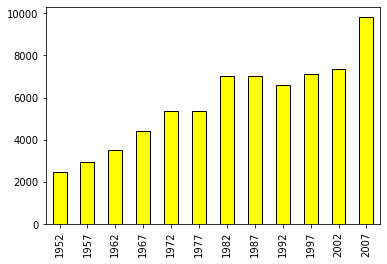

In [16]:
 #Here we have green color bars with black edges
df_namerica.loc['Panama'].plot(kind='bar', color='yellow', edgecolor='black') 

### Add title and axes labels/ Custom labels

As a good coding hygiene we should always add labels to our axes.

We will also
change the default color of our labels to the desired one.

change orientation of labels on the x-axis to 45 degrees.

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 <a list of 7 Text major ticklabel objects>)

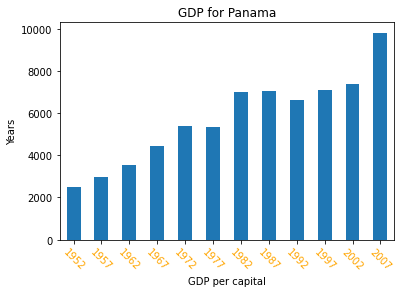

In [19]:
df_namerica.loc['Panama'].plot(kind='bar')  

plt.title('GDP for Panama')

plt.xlabel('GDP per capital')

plt.ylabel('Years')

plt.xticks(color="orange", rotation = -45) #change color of labels on x-axis

plt.yticks(color="black") #change color of labels on y-axis

### Add pattern to bars in a bar chart

We may add a specific pattern to the bars in the bar chart
As an example, we added 'X' to the bars here. You may try out the following patterns:

* /
* |
* -
* +
* x
* o
* O
* .
* *

Each value corresponds to a different hatching pattern

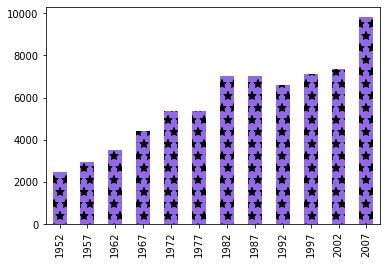

In [21]:
df_namerica.loc['Panama'].plot(kind='bar', hatch = '*', color='#632cda' , alpha = 0.7)  

## Bar Chart with Number of observation

We will now plot the bar chart along with the individual observations of each bar in the bar chart.


Display the data set for Panama: We may also define a new data frame with data set specific to the desired location (Panama in this case) and use that newly created data frame.


In [22]:
df_panama = df_namerica.loc['Panama']
df_panama

1952    2480.380334
1957    2961.800905
1962    3536.540301
1967    4421.009084
1972    5364.249663
1977    5351.912144
1982    7009.601598
1987    7034.779161
1992    6618.743050
1997    7113.692252
2002    7356.031934
2007    9809.185636
Name: Panama, dtype: float64

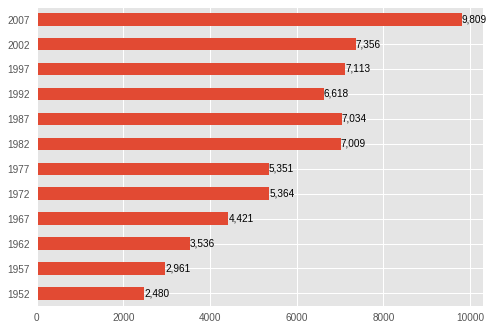

In [29]:
df_panama.plot(kind='barh',)

for index, value in enumerate(df_panama): 

    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 0.1 from y to make it fit within the bar)     
    
    plt.annotate(label, xy=(value, index - 0.10), color='black')

# plt.annotate(label, xy=(1952, 100),  color='black')

We can also plot the same bar graph vertically using style sheets available. 

Use `style.use()`

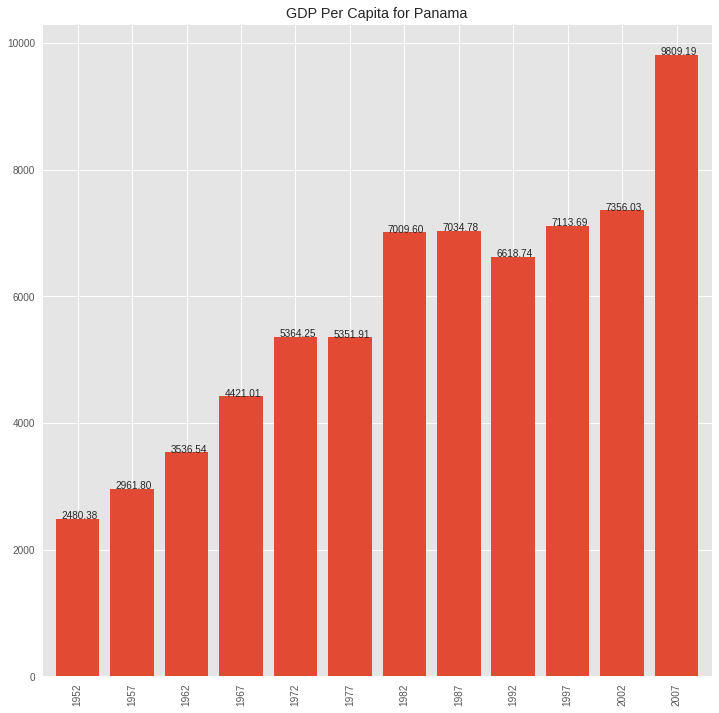

In [27]:
import matplotlib as mpl

import matplotlib.pyplot as plt

mpl.style.use('ggplot')

ax=df_panama.plot(kind='bar', figsize=(12, 12),width=0.8)

plt.title("GDP Per Capita for Panama") # add title to the plot

x_offset = -0.3

y_offset = 0.2

for p in ax.patches:

    b = p.get_bbox()

    val = "{:.2f}".format(b.y1 + b.y0)       

    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

plt.show()